<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/09_Image_K%C3%A9pfeloszt%C3%A1s_Residu%C3%A1lisok_Alapj%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

sns.set_theme()
sns.set_style("whitegrid")
sns.set_style("ticks")

def summary(image):
	if image.ndim == 2:
		SUM = ('\n{0:>10s}: {1:>15.4f}').format('min', np.amin(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('1st Quar', np.percentile(image, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('median', np.median(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('mean', np.mean(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('3rd Quar', np.percentile(image, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('max', np.amax(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('sigma', np.std(image))
	elif image.ndim == 3:
		R = image[:,:,0]
		G = image[:,:,1]
		B = image[:,:,2]
		SUM = ('{0:>%ss} {1:>%ss} {2:>%ss}' % (27, 15, 15)).format('R', 'G', 'B')
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('min', np.amin(R), np.amin(G), np.amin(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('1st Quar', np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('median', np.median(R), np.median(G), np.median(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('mean', np.mean(R), np.mean(G), np.mean(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('3rd Quar', np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('max', np.amax(R), np.amax(G), np.amax(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('sigma', np.std(R), np.std(G), np.std(B))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	print(SUM)

def histogram(image, **kwargs):
	x, y = (3*(256 + 100), 256) if 'dims' not in kwargs else kwargs['dims']
	dpi = 72 if 'dpi' not in kwargs else kwargs['dpi']
	bins = 256 if 'bins' not in kwargs else kwargs['bins']
	rw = 0.95 if 'rw' not in kwargs else kwargs['rw']
	interval = [0, 255] if 'interval' not in kwargs else kwargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	
	gs1 = gridspec.GridSpec(1, 3)
	gs1.update(	left=0,
				right=1,
				bottom=0,
				top=1,
				wspace=0,
				hspace=0)
	ax1 = plt.subplot(gs1[:, 0])
	ax1.axis('off')
	ax2 = plt.subplot(gs1[:, 1:])

	img = image.copy()

	if img.ndim == 2:
		ax1.imshow(	img,
					cmap='gray',
					vmin=interval[0],
					vmax=interval[1])
		ax2.hist(	img.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					color='k')
	elif img.ndim == 3:
		imgo = (img - interval[0])/(interval[1] - interval[0])
		imgo[imgo < 0] = 0
		imgo[imgo > 1] = 1

		R = img[:,:,0]
		G = img[:,:,1]
		B = img[:,:,2]

		ax1.imshow(imgo);
		ax2.hist(	R.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(1, 0, 0.0, 0.7))
		ax2.hist(	G.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0.0, 1, 0, 0.7))
		ax2.hist(	B.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0, 0.0, 1, 0.7))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	plt.show()

def panel(images, gspec, **kargs):
	M, N = gspec

	x, y = (1024, 512) if 'dims' not in kargs else kargs['dims']
	dpi = 72 if 'dpi' not in kargs else kargs['dpi']
	texts = [] if 'texts' not in kargs else kargs['texts']
	tx, ty = (10, 10) if 'text_pos' not in kargs else kargs['text_pos']
	tc = 'white' if 'text_color' not in kargs else kargs['text_color']
	ts = 12 if 'text_size' not in kargs else kargs['text_size']
	interval = [0, 255] if 'interval' not in kargs else kargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	gs = gridspec.GridSpec(N, M)
	gs.update(	left=0, right=1,
                bottom=0, top=1,
                wspace=0, hspace=0)
	images = (images - interval[0])/(interval[1] - interval[0])
	images[images < 0] = 0
	images[images > 1] = 1
	for n in range(N):
		for m in range(M):
			ax = plt.subplot(gs[n, m])
			ax.axis('off')
			try:
				image = images[n*M + m]
			except:
				image = images[0]*0
			if image.ndim == 2:
				ax.imshow(image, cmap='gray')
			else:
				ax.imshow(image)
			try:
				text = texts[n*M + m]
			except:
				text = ''
			ax.text(	tx, ty, text,
						color=tc, size=ts,
						horizontalalignment='left',
						verticalalignment='top')
	plt.show()

<a name="tartalom"></a>

# Amit itt szeretnék megvalósítani
---
Van egy képem amit 3 oszlopos mátrixba teszek <x,y,pixel>.
Végrehajtók rajta egy regressziót pixel = linreg(x,y).
És igazábül arra vagyok kiváncsi, hogy alakulnak a reziduálisok.
Meg kell keresni a legnagyobb reziduálist (nyilván abszolút értékben)
Ahol ez a pont van ott kell elvágni x-et és y-ont.
Igy négy új kép jön létre.
A folyamatot ezeken újra megismételni, amíg a hiba egy bizonyos
szint alá nem megy.
Ha ez megvan akkor a becslésekkel viszatransformálni és megjeleníteni.

In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio
import skimage
import skimage.io
import skimage.filters
from scipy.ndimage.filters import correlate, convolve
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

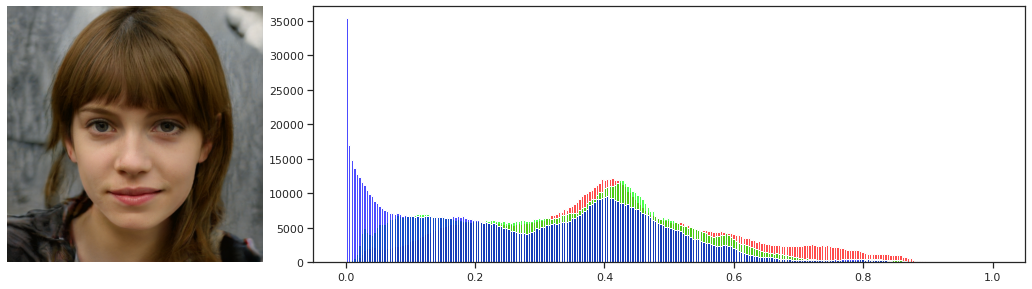

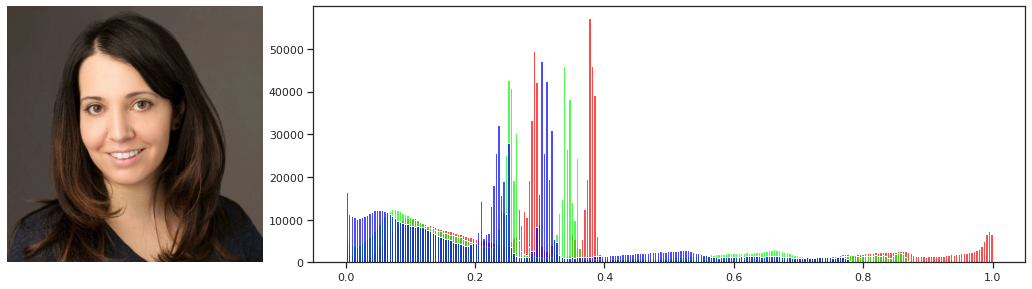

In [3]:
# Képek betöltése és normalizálása [0, 1]
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255
histogram(A, bins=2**8, interval=[0, 1])

B = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman3.jpg?raw=true')/255
histogram(B, bins=2**8, interval=[0, 1])

In [4]:
summary(B)

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:          0.1608          0.1176          0.0902
    median:          0.2902          0.2510          0.2314
      mean:          0.3545          0.2842          0.2376
  3rd Quar:          0.3843          0.3451          0.3098
       max:          1.0000          0.9765          0.9294
     sigma:          0.2589          0.2063          0.1766


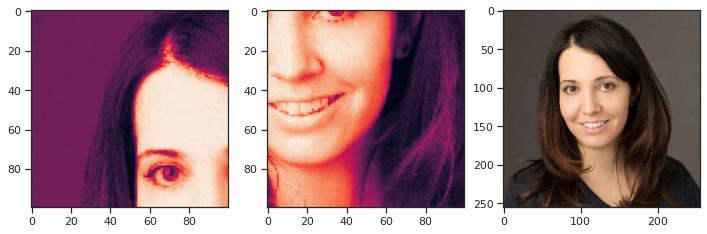

v.max =  1.0
v.min =  0.0
k.max =  1.0
k.min =  0.0


In [5]:
S = B[::4, ::4]

v = S[20:120, 20:120, 0]

k = S[100:200, 100:200, 0]


fig, (a1, a2, a3) = plt.subplots(1, 3, figsize=(12,4))
a1.imshow(v)
a2.imshow(k)
a3.imshow(S)
plt.show()

print('v.max = ', v.max())
print('v.min = ', v.min())
print('k.max = ', k.max())
print('k.min = ', k.min())


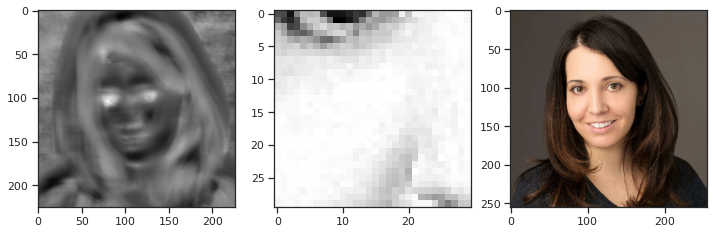

In [6]:
S = B[::4, ::4]

k = S[105:135, 80:110, 0]
r = k.ravel()
kx = k.shape[0]
ky = k.shape[1]

x = S.shape[0]-kx
y = S.shape[1]-ky

c = np.zeros((x, y))

for i in range(x):
  for j in range(y):
    a = S[i:i+kx, j:j+ky, 0]
    b = a.ravel()
    corr, _ = pearsonr(r, b)
    c[i,j] = corr

fig, (a1, a2, a3) = plt.subplots(1, 3, figsize=(12,4))
a1.imshow(c, cmap='gray')
a2.imshow(k, cmap='gray')
a3.imshow(S)
plt.show()

# Beépített könyvtárral

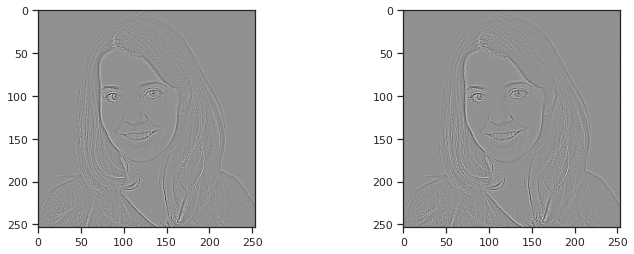

(254, 254)
(254, 254)
2.368627450980392
2.368627450980392


In [7]:
from scipy.signal import convolve2d

A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman3.jpg?raw=true')/255

S = A[::4, ::4]

# Convolution with basic vertical edge detectiong kernel

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])


# Convolved image
new_images = convolve2d(S[:,:,0], kernel, mode = 'valid')

fig, (a0, a1) = plt.subplots(1, 2, figsize=(12, 4))
a0.imshow(new_images, cmap = 'gray');
a1.imshow(new_images, cmap = 'gray')
plt.show()

print(new_images.shape)
print(new_images.shape)

print(new_images.max())
print(new_images.max())

# NumPy Transformation

In [8]:
# Képek betöltése és normalizálása [0, 1]
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman3.jpg?raw=true')/255

In [9]:
# Transform x,y,gray

gray = (A[:,:,0] + A[:,:,1] + A[:,:,2])/3

gray.shape

(1024, 1024)

In [10]:
gray.max()

0.9633986928104575

In [11]:
%%time
g = gray/(gray.max()/1.0)

CPU times: user 3.2 ms, sys: 0 ns, total: 3.2 ms
Wall time: 3.21 ms


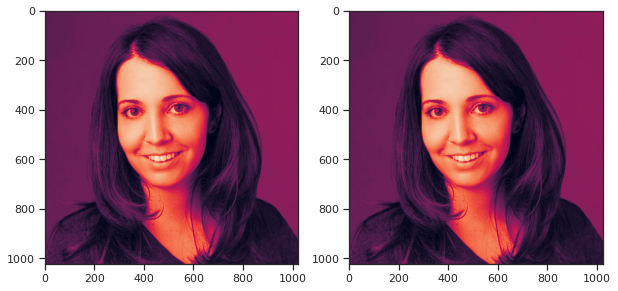

In [12]:
fig, (a1, a2) = plt.subplots(1, 2, figsize=(10, 6))

a1.imshow(gray)
a2.imshow(g)

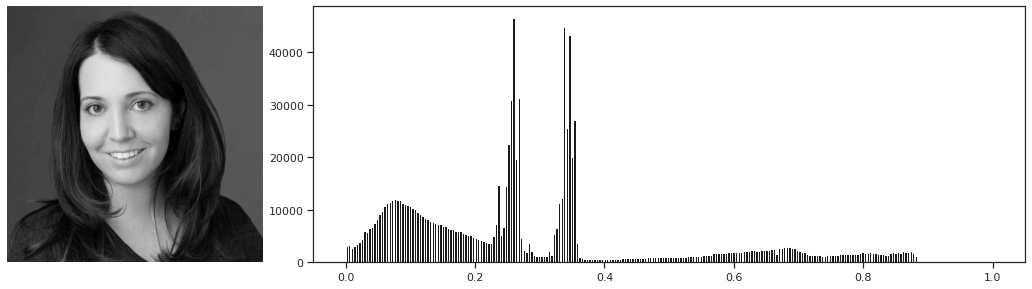

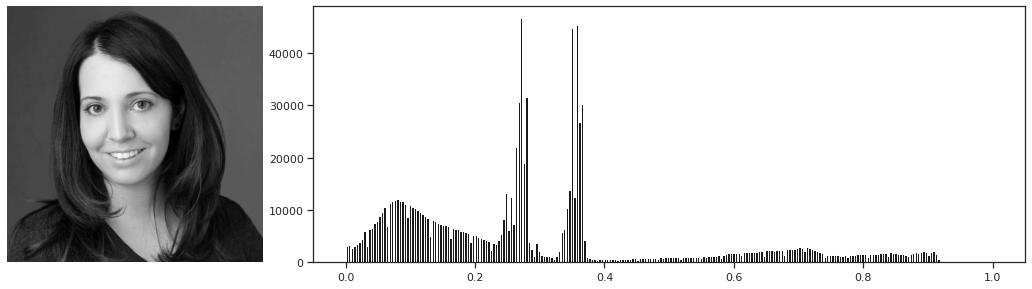

In [13]:
histogram(gray, bins=2**8, interval=[0, 1])
histogram(g,    bins=2**8, interval=[0, 1])

# Transform to 3 columns

In [14]:
x = np.repeat(np.arange(g.shape[0]), len(g.flatten())/len(np.arange(g.shape[0])))
y = np.tile(np.arange(g.shape[1]), int(len(g.flatten())/len(np.arange(g.shape[1]))))
p = g.flatten()

c = np.array([x,y,p])

c = c.T

c.shape

(1048576, 3)

In [15]:
for i in range(5):
  print(c[i])
  print('\t\t       {:.8f}'.format(g[0,i]))

print(c[1024])
print('\t\t       {:.8f}'.format(g[1,0]))

[0.         0.         0.23473541]
		       0.23473541
[0.         1.         0.23473541]
		       0.23473541
[0.         2.         0.23473541]
		       0.23473541
[0.         3.         0.23473541]
		       0.23473541
[0.         4.         0.23473541]
		       0.23473541
[1.         0.         0.23473541]
		       0.23473541


In [16]:
height = g.shape[0]
width  = g.shape[1]

xArray = np.arange(height)
yArray = np.arange(width)

n = g.size

x = np.repeat(xArray, n/height)
y = np.tile(yArray, int(n/width))
p = g.flatten()

c = np.array([x,y,p]).T

print(c.shape)

print('x = ', x[:7])
print('y = ', y[:7])


(1048576, 3)
x =  [0 0 0 0 0 0 0]
y =  [0 1 2 3 4 5 6]


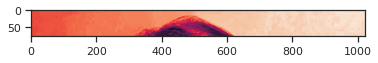

In [17]:
plt.imshow(g[:80,])

In [18]:
g[:,0].size

1024

In [19]:
g[0,:].size

1024

In [20]:
g[0,0]

0.23473541383989144

In [21]:
g.shape

(1024, 1024)

In [22]:
# 80 sor, 108 oszlop
g[80,108]

0.2510176390773406

In [23]:
t = int((80*g.shape[1])+108)
c[t,:]

array([ 80.        , 108.        ,   0.25101764])

In [24]:
c.shape

(1048576, 3)

In [25]:
#c[:,0] sor
#c[:,1] oszlop
#c[:,2] value

# Transponens függvény

In [26]:
def transform_one_chanel(matrix):
  '''
  Turn 2D matrix to id, row, col, value
  '''
  height = matrix.shape[0]
  width  = matrix.shape[1]

  xArray = np.arange(height)
  yArray = np.arange(width)

  n = matrix.size

  x = np.repeat(xArray, n/height)
  y = np.tile(yArray, int(n/width))
  p = matrix.flatten()

  c = np.array([x,y,p]).T

  return c

In [27]:
c = transform_one_chanel(g)

In [28]:
c.shape

(1048576, 3)

In [29]:
original_image = c[:,2].reshape(g.shape[0],g.shape[1])

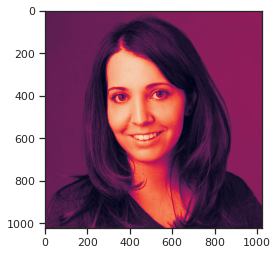

In [30]:
plt.imshow(original_image)

In [31]:
def detransform(transformed, original):
  return transformed[:,2].reshape(original.shape[0], original.shape[1])

In [32]:
original_image = detransform(c, g)

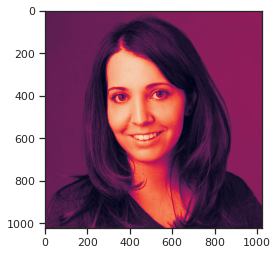

In [33]:
plt.imshow(original_image)

# Linear regression

In [34]:
model = np.polyfit(c[:,0], c[:,2], 1)

In [35]:
print(model)

[-9.05899213e-05  3.49530972e-01]


In [36]:
p = model[0] * x + model[1]

In [37]:
c[:,2] = p

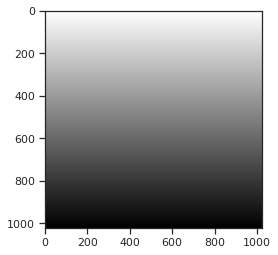

In [38]:
modified = detransform(c, g)

plt.imshow(modified, cmap='gray')

[ 1.37357890e-01  5.30560070e-04 -6.07184742e-07  6.28341295e-04
 -6.16096624e-07]


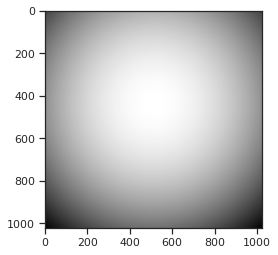

In [39]:

c = transform_one_chanel(g)
d = c.copy()

x = c[:,0]
y = c[:,1]
v = c[:,2]

M = np.column_stack([np.ones(len(x)), x, x**2, y, y**2])

result, _, _, _ = np.linalg.lstsq(M, v)

print(result)

p = result[0] + (result[1] * x)  + (result[2] * x**2) + (result[3] * y) + (result[4] * y**2)

d[:,2] = p

modified = detransform(d, g)

plt.imshow(modified, cmap='gray')
plt.show()


In [40]:
deviation = abs(c[:,2] - d[:,2])

f = c.copy()

f[:,2] = deviation

residuals = detransform(f, g)


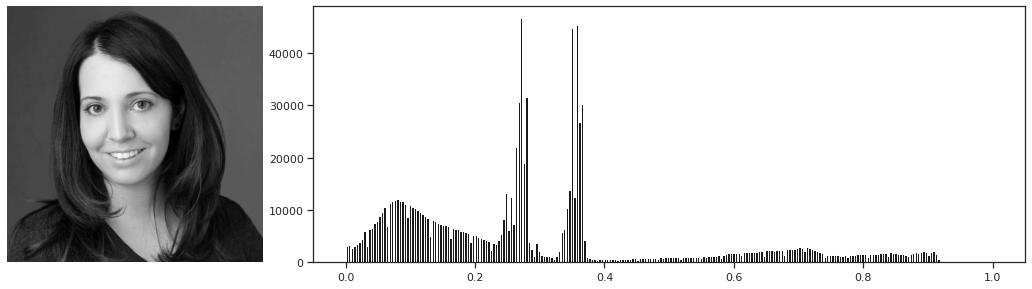

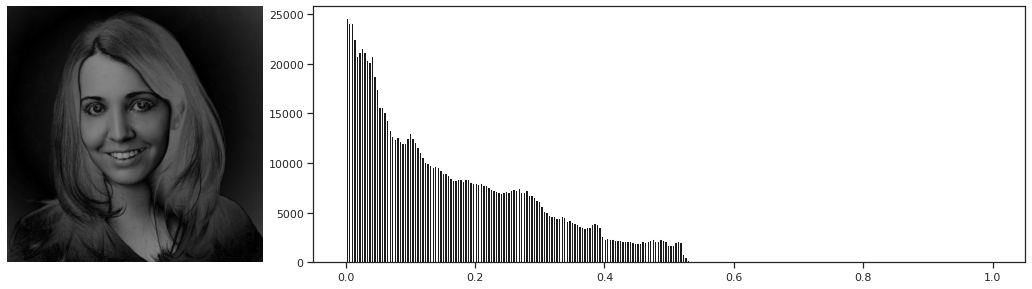

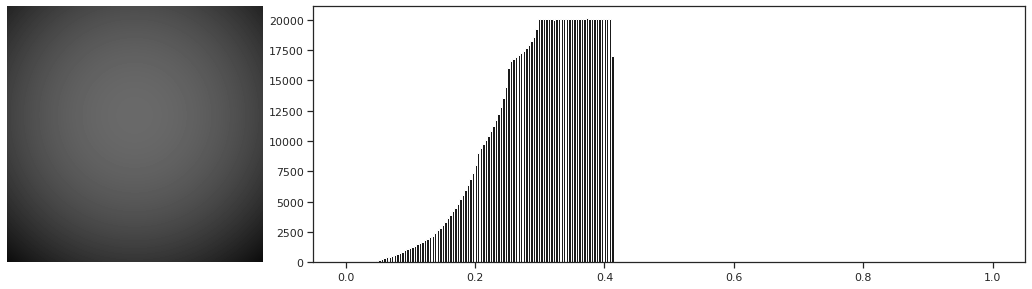

In [41]:
histogram(g,    bins=2**8, interval=[0, 1])
histogram(residuals,    bins=2**8, interval=[0, 1])
histogram(modified,    bins=2**8, interval=[0, 1])

In [42]:
np.argmax(c[:,2])

606658

In [43]:
c[np.argmax(c[:,2])]

array([592., 450.,   1.])

In [44]:
f[np.argmax(f[:,2])]

array([592.        , 450.        ,   0.60335293])

In [45]:
# na most kéne a c-t négy részre bontani a fentiek alapján

In [46]:
# Fontos

# g - az eredeti kép ami 1024x1024 mátrix

# c - g-nek a 3 oszlopuvá alakított változata ahol <x,y,pixel>

# p - c-n illesztett regresszió - sima egy dimenziós vector

# d - c-hez hasonló 3 oszlopúvá alakítot változat ahol <x,y,prediction>

# deviation = abs(c[:,2] - d[:,2]) vagyis a valós pix és a pred között dif

# f - c-hez hasonló 3 oszlopúvá alakított változat ahol <x,y,deviation>



In [47]:
# végeredményben

# f[np.argmax(f[:,2])] mondja meg, hogy hol van az a pont, ahol a deviáció
#                                  ahol a deviáció a legnagyobb

In [48]:

# innentől viszont két változat van. Az egyik lenne az egyszerűbb, mert a végén nem kéne összefüzögetnem a dolgokat, de nem tudom, hogy csinálja meg

# arról van szó, hogy c<x,y,pixel> numpy tömböt kéne lefirteleznem úgy, hogy utna csak bizonyos részein mejen a regresszió


# a második megoldás, hogy fogom a g mátrixot és csak egy szeletét vágom ki, csinálok belőle egy c-t végig csinálom rajta az egész procedurát amit fent leírtam
# beleteszem az eredményt mármint a predicted eredményét egy listába és a végén amikor kiolvasom és összfüzőm, akkor az összefüzött numpy tömbön csinálok
# egy sorbarendezést x-n és y-n így visszakapom az eredeti sorrendet és ezt alakítom vissza 1024x1024 mátrix formába. ez útóbbi mellett döntök

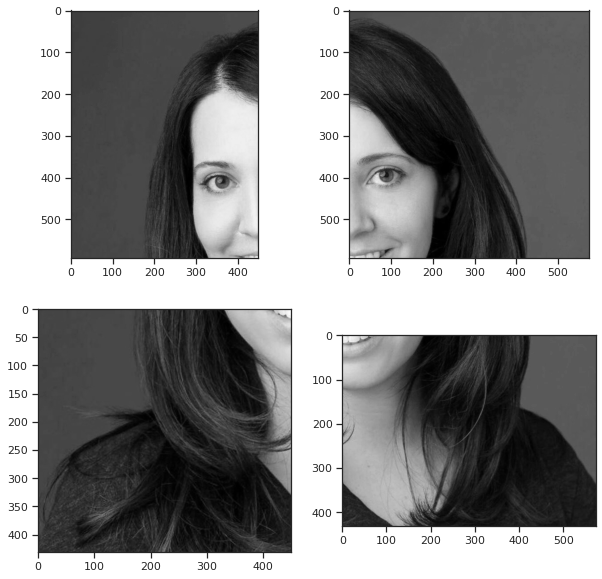

(266400, 3)
(339808, 3)
(194400, 3)
(247968, 3)
[ 1.16266517e-01  1.19643762e-03 -1.43562651e-06 -1.20960009e-03
  4.85334869e-06]
[ 5.27122037e-01 -6.38494661e-05  3.87741744e-07 -2.14739193e-03
  3.49313104e-06]
[ 4.94505521e-01 -9.40107251e-04  9.59172545e-07 -2.21336790e-03
  5.34049193e-06]
[ 7.83376741e-01  1.22440319e-04 -6.33728368e-07 -3.47716133e-03
  4.71557985e-06]


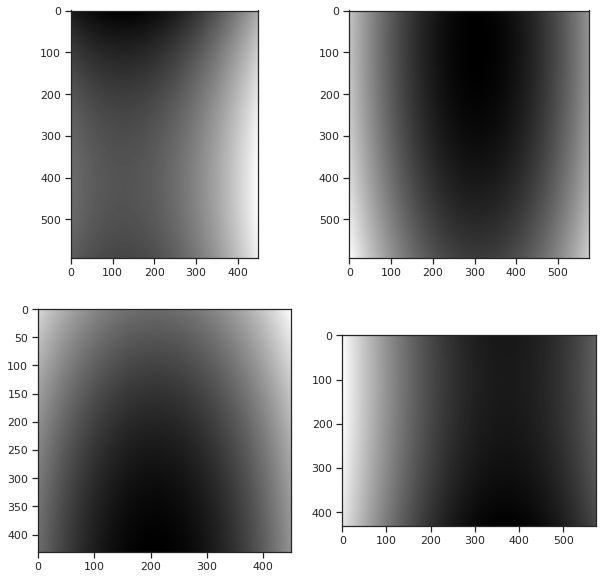

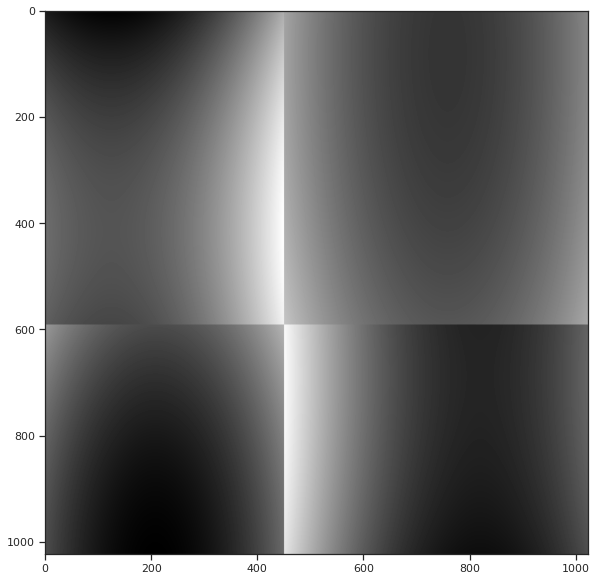

In [87]:
u1 = f[np.argmax(f[:,2])].astype(int)
g1 = g[0:u1[0],0:u1[1]]
g2 = g[0:u1[0],u1[1]:]
g3 = g[u1[0]:, 0:u1[1]]
g4 = g[u1[0]:, u1[1]:]

# sajnos itt van elbaszva az egész, ugyanis a képmátrixból veszem ki az elemeket, majd azokat alakítm át 3-as vektorokban igy minden egyes
# hármas vektorban a sor és az oszlop változó számlálása is 0-ról indul és nem az eredeti indexéből

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].imshow(g1, cmap='gray')
ax[0,1].imshow(g2, cmap='gray')
ax[1,0].imshow(g3, cmap='gray')
ax[1,1].imshow(g4, cmap='gray')
plt.show()

c1 = transform_one_chanel(g1)
c2 = transform_one_chanel(g2)
c3 = transform_one_chanel(g3)
c4 = transform_one_chanel(g4)

print(c1.shape)
print(c2.shape)
print(c3.shape)
print(c4.shape)

d1 = c1.copy()
d2 = c2.copy()
d3 = c3.copy()
d4 = c4.copy()

M1 = np.column_stack([np.ones(len(c1[:,0])), c1[:,0], c1[:,0]**2, c1[:,1], c1[:,1]**2])
M2 = np.column_stack([np.ones(len(c2[:,0])), c2[:,0], c2[:,0]**2, c2[:,1], c2[:,1]**2])
M3 = np.column_stack([np.ones(len(c3[:,0])), c3[:,0], c3[:,0]**2, c3[:,1], c3[:,1]**2])
M4 = np.column_stack([np.ones(len(c4[:,0])), c4[:,0], c4[:,0]**2, c4[:,1], c4[:,1]**2])

result1, _, _, _ = np.linalg.lstsq(M1, c1[:,2])
result2, _, _, _ = np.linalg.lstsq(M2, c2[:,2])
result3, _, _, _ = np.linalg.lstsq(M3, c3[:,2])
result4, _, _, _ = np.linalg.lstsq(M4, c4[:,2])

print(result1)
print(result2)
print(result3)
print(result4)

p1 = result1[0] + (result1[1] * c1[:,0])  + (result1[2] * c1[:,0]**2) + (result1[3] * c1[:,1]) + (result1[4] * c1[:,1]**2)
p2 = result2[0] + (result2[1] * c2[:,0])  + (result2[2] * c2[:,0]**2) + (result2[3] * c2[:,1]) + (result2[4] * c2[:,1]**2)
p3 = result3[0] + (result3[1] * c3[:,0])  + (result3[2] * c3[:,0]**2) + (result3[3] * c3[:,1]) + (result3[4] * c3[:,1]**2)
p4 = result4[0] + (result4[1] * c4[:,0])  + (result4[2] * c4[:,0]**2) + (result4[3] * c4[:,1]) + (result4[4] * c4[:,1]**2)

d1[:,2] = p1
d2[:,2] = p2
d3[:,2] = p3
d4[:,2] = p4

i1 = detransform(d1, g1)
i2 = detransform(d2, g2)
i3 = detransform(d3, g3)
i4 = detransform(d4, g4)

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].imshow(i1, cmap='gray')
ax[0,1].imshow(i2, cmap='gray')
ax[1,0].imshow(i3, cmap='gray')
ax[1,1].imshow(i4, cmap='gray')
plt.show()


# képek összefűzése
img = np.zeros([g.shape[0], g.shape[1]])

img[0:u1[0],0:u1[1]] = i1
img[0:u1[0],u1[1]:]  = i2
img[u1[0]:, 0:u1[1]] = i3
img[u1[0]:, u1[1]:]  = i4

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()





In [98]:

# ugyan ezt meg kell csinálni úgy is, hogy ne vesszenek el a sor és oszlopszámok

u1 = f[np.argmax(f[:,2])].astype(int)


c1 = c[c[:,0] < 10]
print(c1.shape)

c1 = c[np.where(c[:,0] < 9)]
print(c1.shape)

c1 = c[np.where(c[:,0] < 4) and np.where(c[:,1] < 3)]
print(c1.shape)

c1 = c[np.where((c[:,0] < 4) * (c[:,1] < 3))]
print(c1.shape)
c1



(10240, 3)
(9216, 3)
(3072, 3)
(12, 3)


array([[0.        , 0.        , 0.23473541],
       [0.        , 1.        , 0.23473541],
       [0.        , 2.        , 0.23473541],
       [1.        , 0.        , 0.23473541],
       [1.        , 1.        , 0.23473541],
       [1.        , 2.        , 0.23473541],
       [2.        , 0.        , 0.23473541],
       [2.        , 1.        , 0.23473541],
       [2.        , 2.        , 0.23473541],
       [3.        , 0.        , 0.23473541],
       [3.        , 1.        , 0.23473541],
       [3.        , 2.        , 0.23473541]])

(266400, 3)
(339808, 3)
(194400, 3)
(247968, 3)
[ 1.16266517e-01  1.19643762e-03 -1.43562651e-06 -1.20960009e-03
  4.85334869e-06]
[ 2.20080744e+00 -6.38494661e-05  3.87741744e-07 -5.29120987e-03
  3.49313104e-06]
[ 1.38720446e+00 -2.07576754e-03  9.59172545e-07 -2.21336790e-03
  5.34049193e-06]
[ 3.00842061e+00  8.72774706e-04 -6.33728368e-07 -7.72118319e-03
  4.71557985e-06]


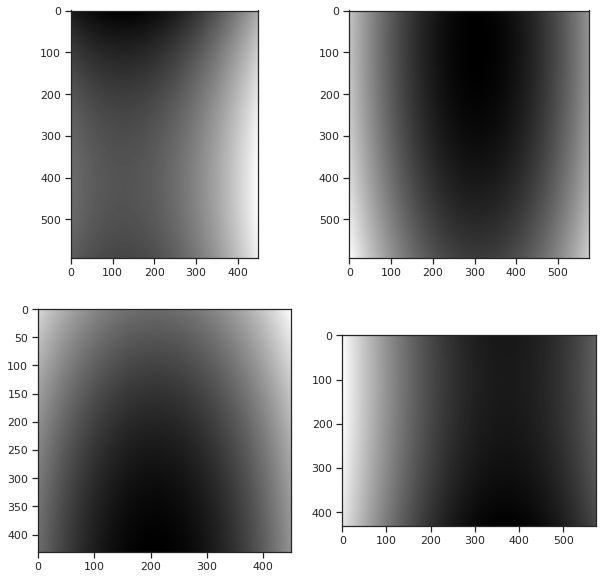

In [113]:
# ugyan ezt meg kell csinálni úgy is, hogy ne vesszenek el a sor és oszlopszámok

u1 = f[np.argmax(f[:,2])].astype(int)

c1 = c[np.where((c[:,0] < u1[0]) * (c[:,1] < u1[1]))]
c2 = c[np.where((c[:,0] < u1[0]) * (c[:,1] >= u1[1]))]
c3 = c[np.where((c[:,0] >= u1[0]) * (c[:,1] < u1[1]))]
c4 = c[np.where((c[:,0] >= u1[0]) * (c[:,1] >= u1[1]))]

print(c1.shape)
print(c2.shape)
print(c3.shape)
print(c4.shape)

d1 = c1.copy()
d2 = c2.copy()
d3 = c3.copy()
d4 = c4.copy()

M1 = np.column_stack([np.ones(len(c1[:,0])), c1[:,0], c1[:,0]**2, c1[:,1], c1[:,1]**2])
M2 = np.column_stack([np.ones(len(c2[:,0])), c2[:,0], c2[:,0]**2, c2[:,1], c2[:,1]**2])
M3 = np.column_stack([np.ones(len(c3[:,0])), c3[:,0], c3[:,0]**2, c3[:,1], c3[:,1]**2])
M4 = np.column_stack([np.ones(len(c4[:,0])), c4[:,0], c4[:,0]**2, c4[:,1], c4[:,1]**2])

result1, _, _, _ = np.linalg.lstsq(M1, c1[:,2])
result2, _, _, _ = np.linalg.lstsq(M2, c2[:,2])
result3, _, _, _ = np.linalg.lstsq(M3, c3[:,2])
result4, _, _, _ = np.linalg.lstsq(M4, c4[:,2])

print(result1)
print(result2)
print(result3)
print(result4)

p1 = result1[0] + (result1[1] * c1[:,0])  + (result1[2] * c1[:,0]**2) + (result1[3] * c1[:,1]) + (result1[4] * c1[:,1]**2)
p2 = result2[0] + (result2[1] * c2[:,0])  + (result2[2] * c2[:,0]**2) + (result2[3] * c2[:,1]) + (result2[4] * c2[:,1]**2)
p3 = result3[0] + (result3[1] * c3[:,0])  + (result3[2] * c3[:,0]**2) + (result3[3] * c3[:,1]) + (result3[4] * c3[:,1]**2)
p4 = result4[0] + (result4[1] * c4[:,0])  + (result4[2] * c4[:,0]**2) + (result4[3] * c4[:,1]) + (result4[4] * c4[:,1]**2)

d1[:,2] = p1
d2[:,2] = p2
d3[:,2] = p3
d4[:,2] = p4

i1 = detransform(d1, g1)
i2 = detransform(d2, g2)
i3 = detransform(d3, g3)
i4 = detransform(d4, g4)

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].imshow(i1, cmap='gray')
ax[0,1].imshow(i2, cmap='gray')
ax[1,0].imshow(i3, cmap='gray')
ax[1,1].imshow(i4, cmap='gray')
plt.show()


# most jön az, hogy össze kéne fűzni a képeket, de inkább az d1, d2, d3, d4-et



In [161]:
print('d1[:,0].min() = ', d1[:,0].min())
print('d1[:,0].max() = ', d1[:,0].max())
print('d1[:,1].min() = ', d1[:,1].min())
print('d1[:,1].max() = ', d1[:,1].max())

print('---------------')

print('d2[:,0].min() = ', d2[:,0].min())
print('d2[:,0].max() = ', d2[:,0].max())
print('d2[:,1].min() = ', d2[:,1].min())
print('d2[:,1].max() = ', d2[:,1].max())

print('---------------')

print('d3[:,0].min() = ', d3[:,0].min())
print('d3[:,0].max() = ', d3[:,0].max())
print('d3[:,1].min() = ', d3[:,1].min())
print('d3[:,1].max() = ', d3[:,1].max())

print('---------------')

print('d4[:,0].min() = ', d4[:,0].min())
print('d4[:,0].max() = ', d4[:,0].max())
print('d4[:,1].min() = ', d4[:,1].min())
print('d4[:,1].max() = ', d4[:,1].max())

d1[:,0].min() =  0.0
d1[:,0].max() =  591.0
d1[:,1].min() =  0.0
d1[:,1].max() =  449.0
---------------
d2[:,0].min() =  0.0
d2[:,0].max() =  591.0
d2[:,1].min() =  450.0
d2[:,1].max() =  1023.0
---------------
d3[:,0].min() =  592.0
d3[:,0].max() =  1023.0
d3[:,1].min() =  0.0
d3[:,1].max() =  449.0
---------------
d4[:,0].min() =  592.0
d4[:,0].max() =  1023.0
d4[:,1].min() =  450.0
d4[:,1].max() =  1023.0


(1048576, 3)
Index(['row', 'col', 'val'], dtype='object')
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(1024, 1024)


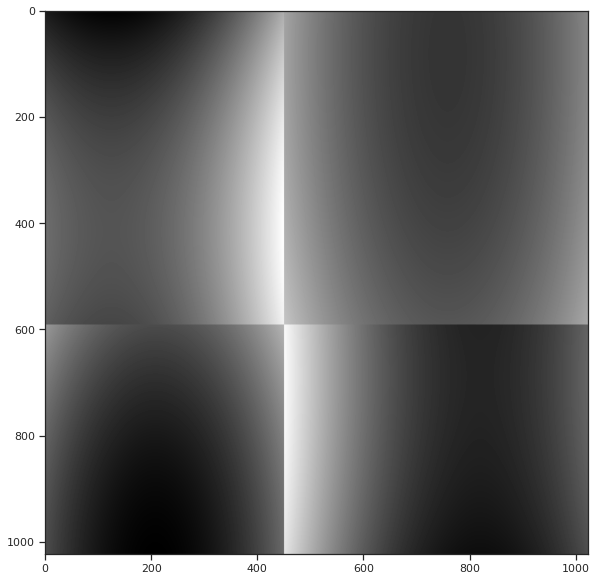

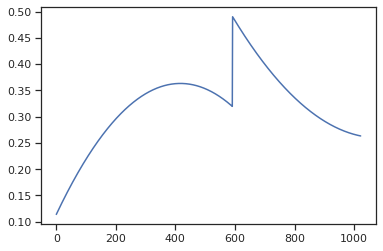

In [173]:
ds = [d1, d2, d3, d4]

img = np.empty([1,3])

for i in ds:
  img = np.concatenate((img, i))

img = np.delete(img, 0, axis=0)

print(img.shape)

df = pd.DataFrame({'row': img[:, 0], 'col': img[:, 1], 'val': img[:, 2]})

df.sort_values(['row', 'col'], ascending=[True, True], inplace=True)

print(df.columns)
print(type(df['val']))
print(type(df['val'].values))


pic = df['val'].values.reshape(g.shape[0], g.shape[1])

print(pic.shape)

plt.figure(figsize=(10,10))
plt.imshow(pic, cmap='gray')
plt.show()

plt.plot(pic[0:1023,2])


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


Numpy Arrays in Python
<br>
https://towardsdatascience.com/reshaping-numpy-arrays-in-python-a-step-by-step-pictorial-tutorial-aed5f471cf0b


Chapter 1. Vectors, Matrices, and Arrays
<br>
https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch01.html

Math is Fun - Vectors
<br>
https://www.mathsisfun.com/algebra/vectors.html


Wikipedia - 'Euclidean Vector'
<br>
https://en.wikipedia.org/wiki/Euclidean_vector


The determinant | Essence of linear algebra, chapter 5, 3Blue1Brown
<br>
https://www.youtube.com/watch?v=Ip3X9LOh2dk


Determinant, Wolfram MathWorld
<br>
https://mathworld.wolfram.com/Determinant.html


The rank of the matrix
<br>
https://www.cliffsnotes.com/study-guides/algebra/linear-algebra/real-euclidean-vector-spaces/the-rank-of-a-matrix


Eigenvectors and Eigenvalues Explained Visually, Setosa.io
<br>
https://setosa.io/ev/eigenvectors-and-eigenvalues/


Eigenvectors and eigenvalues | Essence of linear algebra, Chapter 10, 3Blue1Brown
<br>
https://www.youtube.com/watch?v=PFDu9oVAE-g


Vector dot product and vector length, Khan Academy
<br>
https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length


Dot Product, Paul’s Online Math Notes
<br>
https://tutorial.math.lamar.edu/Classes/CalcII/DotProduct.aspx


StackOverflow - 'Fit data to curve using polyfit with multiple variables in python using numpy polyfit'
<br>
https://stackoverflow.com/questions/34746724/fit-data-to-curve-using-polyfit-with-multiple-variables-in-python-using-numpy-po